In [1]:
# Import all of the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_curve, auc, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import svm
import xgboost as xgb
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
# Observe the first five rows
oil = pd.read_csv('/content/synthetic_oil_data.csv')
oil.head()

,Rock_Type,Porosity,Permeability,Trap_Type,Seismic_Score,Proximity_to_Oil_Field,Estimated_Reservoir_Depth,Oil_Presence
0,Shale,0.438848,903.714252,NaN,0.181881,4.226811,1547,0
1,Sandstone,6.217269,111.883819,Fault,0.169586,0.583624,4878,0
2,Shale,21.397076,177.944336,NaN,0.862800,0.180588,1815,0
3,Shale,11.598605,429.236160,Dome,0.498148,3.042691,1886,0
4,Sandstone,19.874518,127.586022,Anticline,0.245937,1.708715,4420,0


In [3]:
# Check the data types
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rock_Type                  5000 non-null   object 
 1   Porosity                   5000 non-null   float64
 2   Permeability               5000 non-null   float64
 3   Trap_Type                  3747 non-null   object 
 4   Seismic_Score              5000 non-null   float64
 5   Proximity_to_Oil_Field     5000 non-null   float64
 6   Estimated_Reservoir_Depth  5000 non-null   int64  
 7   Oil_Presence               5000 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 312.6+ KB


In [4]:
# Check for null values
oil.isnull().sum()

,0
Rock_Type,0
Porosity,0
Permeability,0
Trap_Type,1253
Seismic_Score,0
Proximity_to_Oil_Field,0
Estimated_Reservoir_Depth,0
Oil_Presence,0


In [5]:
# Drop rows with null values
oil = oil.dropna()

In [6]:
# Check for null values again
oil.isnull().sum()

,0
Rock_Type,0
Porosity,0
Permeability,0
Trap_Type,0
Seismic_Score,0
Proximity_to_Oil_Field,0
Estimated_Reservoir_Depth,0
Oil_Presence,0


In [7]:
# Encode all of the categorical variables
for col in oil:
    if oil[col].dtype == 'O':
        codes, _ = pd.factorize(oil[col])
        oil[col] = codes + 1

# Logistic Regression

In [8]:
# Create feature and target variables
X = oil.iloc[:, :-1]
y = oil.iloc[:, -1]

In [9]:
# Create training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
 # Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
 # Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.16f}".format(accuracy))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7760000000000000
Precision: 0.6551724137931034
Recall: 0.5757575757575758
F1 Score: 0.6129032258064516


In [13]:
# Create a confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[449  70]
 [ 98 133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       519
           1       0.66      0.58      0.61       231

    accuracy                           0.78       750
   macro avg       0.74      0.72      0.73       750
weighted avg       0.77      0.78      0.77       750



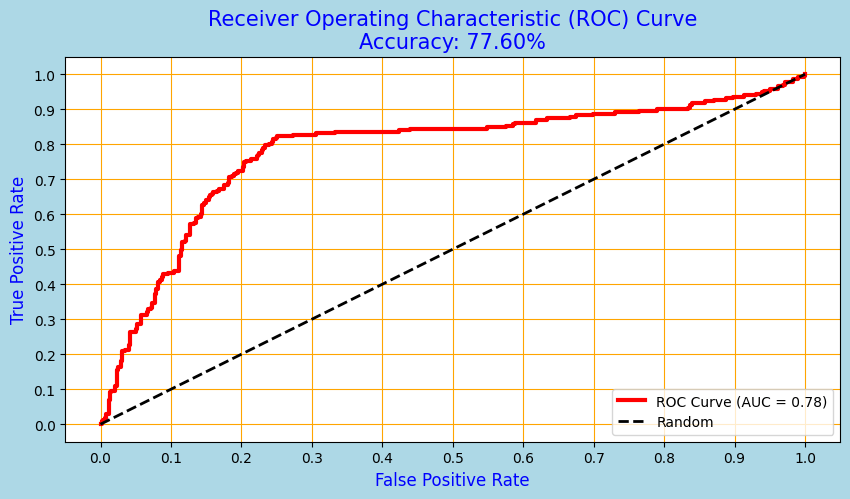

In [14]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5), facecolor= 'lightblue')
plt.plot(fpr, tpr, color='red', lw=3,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate', fontsize = 12 ,color = 'blue')
plt.ylabel('True Positive Rate', fontsize = 12 ,color = 'blue')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy * 100), fontsize = 15, color = 'blue')
plt.legend(loc="lower right")
plt.grid(True, color = 'orange')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

# Decision Trees

In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall Score:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.9048888888888889
Precision: 0.8950819672131147
Recall Score: 0.7844827586206896
F1 score: 0.8361408882082695


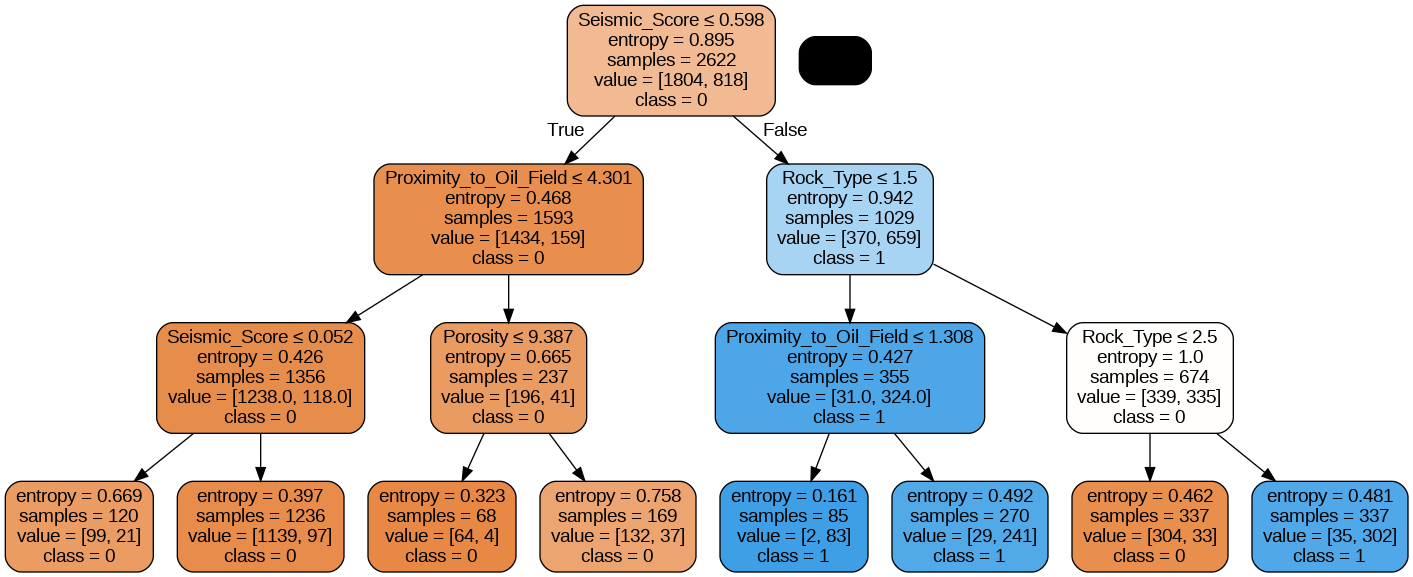

In [18]:
# Get feature names from the DataFrame (assuming 'X' is your feature DataFrame)
feature_cols = X.columns

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Oil.png')
Image(graph.create_png())

# Random Forest

In [19]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
# Create and train a Random Forest classifer
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
# Print the performance metric scores
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision", precision_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred))
print("F1 score", f1_score(y_test, y_pred))

Accuracy: 0.9146666666666666
Precision 0.9243243243243243
Recall 0.7737556561085973
F1 score 0.8423645320197044


# K-Nearest Neighbors (KNN)

In [22]:
# Create and train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=45) # You can adjust n_neighbors
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=45)

In [23]:
# Print the performance metric scores
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7053333333333334
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


# XGboost With Classification

In [24]:
# Create regression matrices
ogtrain = xgb.DMatrix(X_train, y_train, enable_categorical=True)
ogtest = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [25]:
# Create hyperparameters to tune the model
n=150
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 0.1,
}

omodel = xgb.train(params=params,dtrain=ogtrain ,num_boost_round=n)

In [26]:
# Print the performance metric scores
preds = model.predict(ogtest)
preds = preds.astype(int)
print('Accuracy:',accuracy_score(y_test, preds))
print('Precision:', precision_score(y_test, preds))
print('Recall:', recall_score(y_test, preds))
print('F1 Score:', f1_score(y_test, preds))

Accuracy: 0.7053333333333334
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


# Support Vector Machine


In [27]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear')

In [28]:
#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [29]:
# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [30]:
# Print the performance metric scores
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall Score:",metrics.recall_score(y_test, y_pred))
print("F1 score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7493333333333333
Precision: 0.609271523178808
Recall Score: 0.416289592760181
F1 score: 0.4946236559139785
